In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix,f1_score,precision_score,recall_score
import seaborn as sns
from imblearn.over_sampling import SMOTE


In [148]:
df = pd.read_csv('Dataset/heart_statlog_cleveland_hungary_final.csv')

In [149]:
df.head()

,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,target
0,40,1,2,140,289,0,0,172,0,0.0,1,0
1,49,0,3,160,180,0,0,156,0,1.0,2,1
2,37,1,2,130,283,0,1,98,0,0.0,1,0
3,48,0,4,138,214,0,0,108,1,1.5,2,1
4,54,1,3,150,195,0,0,122,0,0.0,1,0


In [150]:
df.shape

(1190, 12)

In [151]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1190 entries, 0 to 1189
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  1190 non-null   int64  
 1   sex                  1190 non-null   int64  
 2   chest pain type      1190 non-null   int64  
 3   resting bp s         1190 non-null   int64  
 4   cholesterol          1190 non-null   int64  
 5   fasting blood sugar  1190 non-null   int64  
 6   resting ecg          1190 non-null   int64  
 7   max heart rate       1190 non-null   int64  
 8   exercise angina      1190 non-null   int64  
 9   oldpeak              1190 non-null   float64
 10  ST slope             1190 non-null   int64  
 11  target               1190 non-null   int64  
dtypes: float64(1), int64(11)
memory usage: 111.7 KB


In [152]:
df.isnull().sum()

age                    0
sex                    0
chest pain type        0
resting bp s           0
cholesterol            0
fasting blood sugar    0
resting ecg            0
max heart rate         0
exercise angina        0
oldpeak                0
ST slope               0
target                 0
dtype: int64

In [153]:
df.corr()

,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,target
age,1.000000,0.015096,0.149055,0.257692,-0.046472,0.178923,0.194595,-0.368676,0.188095,0.245093,0.237749,0.262029
sex,0.015096,1.000000,0.138405,-0.006443,-0.208441,0.110961,-0.022225,-0.181837,0.194380,0.096390,0.127913,0.311267
chest pain type,0.149055,0.138405,1.000000,0.009466,-0.109396,0.076492,0.035705,-0.337491,0.403428,0.224106,0.276949,0.460127
resting bp s,0.257692,-0.006443,0.009466,1.000000,0.099037,0.088235,0.095860,-0.101357,0.142435,0.176111,0.089384,0.121415
cholesterol,-0.046472,-0.208441,-0.109396,0.099037,1.000000,-0.239778,0.150879,0.238028,-0.033261,0.057451,-0.100053,-0.198366
fasting blood sugar,0.178923,0.110961,0.076492,0.088235,-0.239778,1.000000,0.032124,-0.118689,0.053053,0.031193,0.145902,0.216695
resting ecg,0.194595,-0.022225,0.035705,0.095860,0.150879,0.032124,1.000000,0.058812,0.037821,0.126023,0.093629,0.073059
max heart rate,-0.368676,-0.181837,-0.337491,-0.101357,0.238028,-0.118689,0.058812,1.000000,-0.377691,-0.183688,-0.350750,-0.413278
exercise angina,0.188095,0.194380,0.403428,0.142435,-0.033261,0.053053,0.037821,-0.377691,1.000000,0.370772,0.393408,0.481467
oldpeak,0.245093,0.096390,0.224106,0.176111,0.057451,0.031193,0.126023,-0.183688,0.370772,1.000000,0.524639,0.398385


In [154]:
df = df[['age','sex','chest pain type','resting bp s','exercise angina','target']]

In [155]:
df.head()

,age,sex,chest pain type,resting bp s,exercise angina,target
0,40,1,2,140,0,0
1,49,0,3,160,0,1
2,37,1,2,130,0,0
3,48,0,4,138,1,1
4,54,1,3,150,0,0


<Axes: xlabel='target', ylabel='count'>

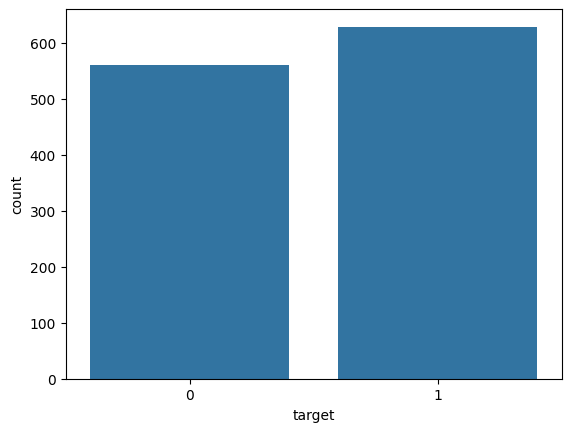

In [156]:
sns.countplot(x='target', data=df)

In [157]:
y = df['target']
X = df.drop('target', axis=1)

In [158]:
# Initialize the SMOTE object
smote = SMOTE(random_state=42)

# Fit and apply SMOTE to the training data
X, y = smote.fit_resample(X, y)

# Check the class distribution after applying SMOTE
print("Class distribution before SMOTE:", X.value_counts())
print("Class distribution after SMote:", y.value_counts())

Class distribution before SMOTE: age  sex  chest pain type  resting bp s  exercise angina
60   1    4                130           1                  7
43   0    2                120           0                  6
51   1    4                140           1                  6
55   1    4                140           1                  5
54   1    4                130           1                  5
                                                           ..
32   0    2                105           0                  1
     1    1                95            0                  1
          2                110           0                  1
                           125           0                  1
          4                118           0                  1
Name: count, Length: 833, dtype: int64
Class distribution after SMote: target
0    629
1    629
Name: count, dtype: int64


In [159]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [160]:
random_forest = RandomForestClassifier(n_estimators=1000)
random_forest.fit(x_train, y_train)

RandomForestClassifier(n_estimators=1000)

In [161]:
predict = random_forest.predict(x_test)

In [162]:
print('Accuracy: ', accuracy_score(y_test, predict))
print('F1 Score: ', f1_score(y_test, predict))
print('Precision: ', precision_score(y_test, predict))
print('Recall: ', recall_score(y_test, predict))

Accuracy:  0.8809523809523809
F1 Score:  0.8790322580645161
Precision:  0.9008264462809917
Recall:  0.8582677165354331


<Axes: >

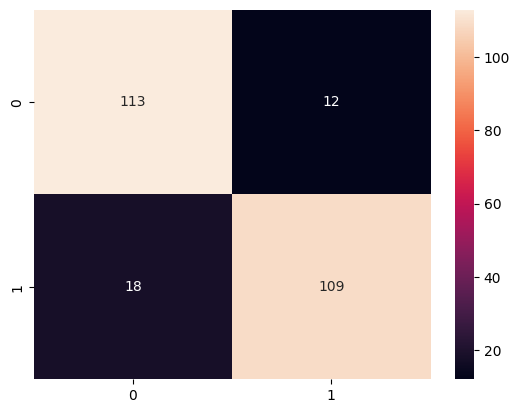

In [163]:
sns.heatmap(confusion_matrix(y_test, predict), annot=True, fmt='d')